In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
scotrail = pd.read_csv('Datasets/scotrail-journey-data-2016-2022.csv')

In [33]:
scotrail.head()

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup4,ProdGrp1,OpJourneys on selDates,OpMiles on selDates,Unnamed: 7
0,2016,2016/P01,2016/W01,East Suburban,Commuter,"68,625","1,163,739",NaN
1,2016,2016/P01,2016/W01,eXpress,Commuter,"33,695","953,075",NaN
2,2016,2016/P01,2016/W01,Inter7City,Commuter,"27,651","757,075",NaN
3,2016,2016/P01,2016/W01,Scenic,Commuter,"9,806","180,878",NaN
4,2016,2016/P01,2016/W01,West Suburban,Commuter,"302,609","3,303,754",NaN


In [34]:
scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].replace(',','', regex=True)
scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].astype('int')

In [125]:
df = scotrail.groupby(['ServiceGroup4','CalendarPeriod'])['OpJourneys on selDates'].sum().reset_index()
df

,ServiceGroup4,CalendarPeriod,OpJourneys on selDates
0,East Suburban,2016/P01,1002385
1,East Suburban,2016/P02,841188
2,East Suburban,2016/P03,752603
3,East Suburban,2016/P04,877365
4,East Suburban,2016/P05,836859
...,...,...,...
400,eXpress,2021/P12,414883
401,eXpress,2021/P13,186402
402,eXpress,2022/P01,299867
403,eXpress,2022/P02,337312


In [90]:
eastsub = df[df['ServiceGroup4'] =='East Suburban']
scenic = df[df['ServiceGroup4'] =='Scenic']
express = df[df['ServiceGroup4'] =='eXpress']
intercity = df[df['ServiceGroup4'] =='Inter7City']
westsub = df[df['ServiceGroup4'] =='West Suburban']

In [142]:
xticks = df[df["CalendarPeriod"].str.contains('P01')]
xticks

,ServiceGroup4,CalendarPeriod,OpJourneys on selDates
0,East Suburban,2016/P01,1002385
13,East Suburban,2017/P01,964667
26,East Suburban,2018/P01,923942
39,East Suburban,2019/P01,888026
52,East Suburban,2020/P01,919357
65,East Suburban,2021/P01,96471
78,East Suburban,2022/P01,457451
81,Inter7City,2016/P01,883489
94,Inter7City,2017/P01,813172
107,Inter7City,2018/P01,765175


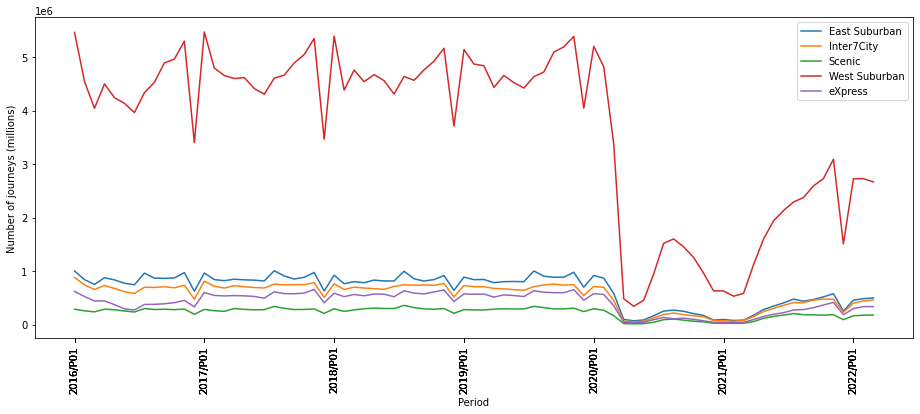

In [146]:
plt.figure(figsize=(40/2.54, 15/2.54))
plt.plot('CalendarPeriod', 'OpJourneys on selDates', data=eastsub, label="East Suburban")
plt.plot('CalendarPeriod', 'OpJourneys on selDates', data=intercity, label="Inter7City")
plt.plot('CalendarPeriod', 'OpJourneys on selDates', data=scenic, label="Scenic")
plt.plot('CalendarPeriod', 'OpJourneys on selDates', data=westsub, label="West Suburban")
plt.plot('CalendarPeriod', 'OpJourneys on selDates', data=express, label="eXpress")
plt.legend()
plt.xticks(xticks["CalendarPeriod"],rotation=90)
plt.xlabel('Period')
plt.ylabel('Number of journeys (millions)')
plt.show()

In [71]:
journeys = df['OpJourneys on selDates']
service = df['ServiceGroup4']

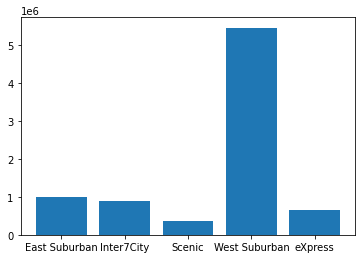

In [39]:
plt.bar(service,journeys);

In [40]:
scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].replace(',','', regex=True)
scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].astype('int')

scotrail["OpMiles on selDates"] = scotrail["OpMiles on selDates"].replace(',','', regex=True)
scotrail["OpMiles on selDates"] = scotrail["OpMiles on selDates"].astype('int')

scotrail["milesdivjourney"] = scotrail["OpMiles on selDates"] / scotrail["OpJourneys on selDates"]

In [41]:
scotrail.head

<bound method NDFrame.head of       CalendarYear CalendarPeriod CalendarWeek  ServiceGroup4  ProdGrp1  \
0             2016       2016/P01     2016/W01  East Suburban  Commuter   
1             2016       2016/P01     2016/W01        eXpress  Commuter   
2             2016       2016/P01     2016/W01     Inter7City  Commuter   
3             2016       2016/P01     2016/W01         Scenic  Commuter   
4             2016       2016/P01     2016/W01  West Suburban  Commuter   
...            ...            ...          ...            ...       ...   
4870          2022       2022/P03     2022/W13  East Suburban      Peak   
4871          2022       2022/P03     2022/W13        eXpress      Peak   
4872          2022       2022/P03     2022/W13     Inter7City      Peak   
4873          2022       2022/P03     2022/W13         Scenic      Peak   
4874          2022       2022/P03     2022/W13  West Suburban      Peak   

      OpJourneys on selDates  OpMiles on selDates  Unnamed: 7  milesd

In [42]:
np.max(scotrail["milesdivjourney"])

96.51901624033623

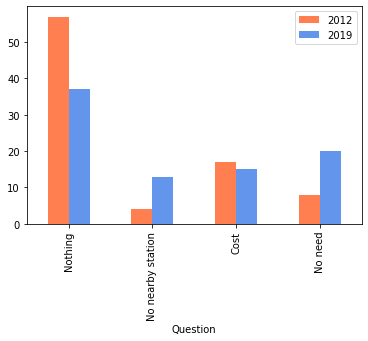

In [78]:
# What are the main reasons of Scottish locals for not using the train?

train_discourage = pd.read_csv('Datasets/train_discourage.csv')
train_discourage.rename(columns = {'Table 42: In general, What discourages you from using the train more often than you do? (2012-2014, 2016, 2019)1,2':'Question', 'Unnamed: 1':'2012', 'Unnamed: 2':'2013', 'Unnamed: 3':'2014', 'Unnamed: 4':'2015', 'Unnamed: 5':'2016','Unnamed: 6':'2017', 'Unnamed: 7':'2018', 'Unnamed: 8':'2019', 'Unnamed: 9':'2020'}, inplace = True)

# In general, What discourages you from using the train more often than you do?

train_discourage = train_discourage.drop(train_discourage.index[33])
train_discourage = train_discourage.drop(train_discourage.index[32])
train_discourage = train_discourage.drop(train_discourage.index[31])
train_discourage = train_discourage.drop(train_discourage.index[30])
train_discourage = train_discourage.drop(train_discourage.index[0])

train_discourage_selection = train_discourage.iloc[:, [0,1,8]]
train_discourage_selection = train_discourage_selection.iloc[[0,1,7,16],:]

train_discourage_selection['2012']=train_discourage_selection['2012'].astype(float)
train_discourage_selection['2019']=train_discourage_selection['2019'].astype(float)

train_discourage_selection.plot(x="Question", y=["2012", "2019"], kind="bar", color=["coral", "cornflowerblue"]);

In [96]:
# Users' views on local train services

local_train_views = pd.read_csv('Datasets/local_train_views.csv')

local_train_views.rename(columns = {"Table 30: [Users' views on local train services] Adults (16+) who have used the train in the previous month, views on their local train services, 20191":'Question', 'Unnamed: 1':'Strongly Agree', 'Unnamed: 2':'Tend to Agree', 'Unnamed: 3':'Total Agree', 'Unnamed: 4':'Neither Agree nor Disagree', 'Unnamed: 5':'Tend to Disagree','Unnamed: 6':'Strongly Disagree', 'Unnamed: 7':'No opinion', 'Unnamed: 8':'Total'}, inplace = True)

local_train_views["Total"] = local_train_views["Total"].replace(',','', regex=True)
local_train_views = local_train_views.iloc[[2,3,4,5,6,7,8,9,10],:]
local_train_views = local_train_views.iloc[:,[0,1,2,4,5,6,7,8]]

local_train_views['Strongly Agree']=local_train_views['Strongly Agree'].astype(float)
local_train_views['Tend to Agree']=local_train_views['Tend to Agree'].astype(float)
local_train_views['Neither Agree nor Disagree']=local_train_views['Neither Agree nor Disagree'].astype(float)
local_train_views['Tend to Disagree']=local_train_views['Tend to Disagree'].astype(float)
local_train_views['Strongly Disagree']=local_train_views['Strongly Disagree'].astype(float)
local_train_views['No opinion']=local_train_views['No opinion'].astype(float)
local_train_views['Total']=local_train_views['Total'].astype(float)

# Stacked bar chart to 100 percent 

import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=local_train_views["Strongly Agree"],
    x=local_train_views.Question,
    name="Strongly Agree %",
    marker=dict(
        color='rgba(0,128,0, 0.6)',
        line=dict(color='rgba(0,128,0, 0.5)', width=0.05)
    )
))
fig.add_trace(go.Bar(
    y=local_train_views["Tend to Agree"],
    x=local_train_views.Question,
    name="Tend to Agree %",
    marker=dict(
        color='rgba(0,0,255, 0.6)',
        line=dict(color='rgba(0,0,255, 0.5)', width=0.05)
    )
))
fig.add_trace(go.Bar(
    y=local_train_views["Neither Agree nor Disagree"],
    x=local_train_views.Question,
    name="Neither Agree nor Disagree %",
    marker=dict(
        color='rgba(128,0,0, 0.5)',
        line=dict(color='rgba(128,0,0, 0.5)', width=0.05)
    )
))
fig.add_trace(go.Bar(
    y=local_train_views["Tend to Disagree"],
    x=local_train_views.Question,
    name="Tend to Disagree %",
    marker=dict(
        color='rgba(219, 109, 166, 0.8)',
        line=dict(color='rgba(219, 109, 166, 0.8)', width=0.05)
    ) 
))
fig.add_trace(go.Bar(
    y=local_train_views["Strongly Disagree"],
    x=local_train_views.Question,
    name="Strongly Disagree %",
    marker=dict(
        color='rgba(194, 203, 22, 0.8)',
        line=dict(color='rgba(194, 203, 22, 0.8)', width=0.05)
    )
))
fig.add_trace(go.Bar(
    y=local_train_views["No opinion"],
    x=local_train_views.Question,
    name="No opinion %",
    marker=dict(
        color='rgba(165, 243, 237, 0.8)',
        line=dict(color='rgba(165, 243, 237, 0.8)', width=0.05)
    )
))
fig.update_layout(
        yaxis=dict(
        title_text="Percentage %",
        ticktext=["0%", "20%", "40%", "60%","80%","100%"],
        tickvals=[0, 20, 40, 60, 80, 100],
        tickmode="array",
        titlefont=dict(size=15),
    ),
    autosize=False,
    width=1000,
    height=400,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title={
        'text': "Likert Scale for user views on local train services",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    barmode='stack')
fig.show()

In [84]:
carbon_ds = pd.read_csv('Datasets/carbon-footprint-travel-mode.csv', dtype = str)
carbon_ds = carbon_ds.drop(['Code', 'Year'], 1)
carbon_ds['GHG emissions (gCO2e/km)'] = carbon_ds['GHG emissions (gCO2e/km)'].astype(float).round(2)
carbon_ds = carbon_ds.sort_values(by=["GHG emissions (gCO2e/km)"], ascending=False)
travel = ['Domestic flight', 'Large car (petrol)', 'Bus', 'National rail' ]
carbon_ds = carbon_ds.loc[carbon_ds['Entity'].isin(travel)]
carbon_ds

,Entity,GHG emissions (gCO2e/km)
11,Large car (petrol),282.95
5,Domestic flight,254.93
1,Bus,104.71
28,National rail,41.15


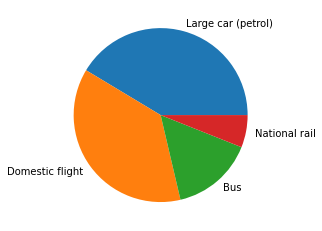

In [99]:
plt.pie(carbon_ds['GHG emissions (gCO2e/km)'], labels = carbon_ds["Entity"])
plt.show()

In [129]:
scotrail_groups = pd.read_csv('Datasets/scotrail_groups.csv')
scotrail_groups = scotrail_groups.iloc[0:38,:]
scotrail_groups

,ServiceGroup,ServiceDescription
0,East Suburban,EDINBURGH-DUNBLANE
1,East Suburban,FIFE CIRCULAR
2,East Suburban,GLASGOW-SHOTTS-EDINBURGH
3,East Suburban,GLC-SHS-EDB (S GLC-SHS)
4,East Suburban,HAYMARKET-NORTH BERWICK
5,eXpress,EDINBURGH-FALKIRK-GLASGOW
6,Inter7City,ABERDEEN-INVERNESS
7,Inter7City,EDINBURGH-ABERDEEN
8,Inter7City,GLA/EDB - DUNDEE/ARBROATH
9,Inter7City,GLASGOW/EDINBURGH-INVERNESS


In [137]:
station_usage = pd.read_csv('Datasets/station_usage.csv')


station_usage["2019-20 Entries & Exits_TOTAL"] = station_usage["2019-20 Entries & Exits_TOTAL"].replace(',','', regex=True)
station_usage["2018-19 Entries & Exits_TOTAL"] = station_usage["2018-19 Entries & Exits_TOTAL"].replace(',','', regex=True)
station_usage["2019-20 Entries & Exits_RANK"] = station_usage["2019-20 Entries & Exits_RANK"].replace(',','', regex=True)

station_usage

,Station Name,2019-20 Entries & Exits_TOTAL,2018-19 Entries & Exits_TOTAL,% change,2019-20 Entries & Exits_RANK,Local Authority,Constituency,NUTS2 Spatial Unit,Network Rail Region,Request stop
0,Aberdeen,2497108,2616142,-4.5%,241,Aberdeen City,Aberdeen North,North Eastern Scotland,Scotland,NaN
1,Aberdour,126340,140048,-9.8%,1624,Fife,Kirkcaldy and Cowdenbeath,Eastern Scotland,Scotland,NaN
2,Achanalt,326,394,-17.3%,2541,Highland,"Ross, Skye and Lochaber",Highlands and Islands,Scotland,Request stop
3,Achnasheen,3234,3284,-1.5%,2438,Highland,"Ross, Skye and Lochaber",Highlands and Islands,Scotland,NaN
4,Achnashellach,836,820,2.0%,2519,Highland,"Ross, Skye and Lochaber",Highlands and Islands,Scotland,Request stop
...,...,...,...,...,...,...,...,...,...,...
351,Wick,16664,17890,-6.9%,2264,Highland,"Caithness, Sutherland and Easter Ross",Highlands and Islands,Scotland,NaN
352,Williamwood,272928,272540,0.1%,1238,East Renfrewshire,East Renfrewshire,West Central Scotland,Scotland,NaN
353,Wishaw,520564,547084,-4.8%,881,North Lanarkshire,Motherwell and Wishaw,West Central Scotland,Scotland,NaN
354,Woodhall,42996,45258,-5.0%,2046,Inverclyde,Inverclyde,West Central Scotland,Scotland,NaN


In [ ]:
station_usage[station_usage["Request stop"] == 'Request stop']